<a href="https://colab.research.google.com/github/SachinSPanchal/Mobile-Price-Range-Prediction/blob/main/Final_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Capstone Project - 3 Mobile Price Range Prediction

#<b>Problem Description

##<b>In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

<b>

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are
Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

2(high cost) and 3(very high cost).

#<b> Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

import warnings
warnings.filterwarnings('ignore')

#<b> Importing Datasets

In [ ]:
path = "/content/data_mobile_price_range.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
#printing top 5 
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#printing last 5
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#defining data types
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
#describing the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
data.shape

(2000, 21)

our dataset has 2000 rows and 21 columns

# <b>Data Cleaning

###<b> Checking Null Values

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### <b> Checking missing values

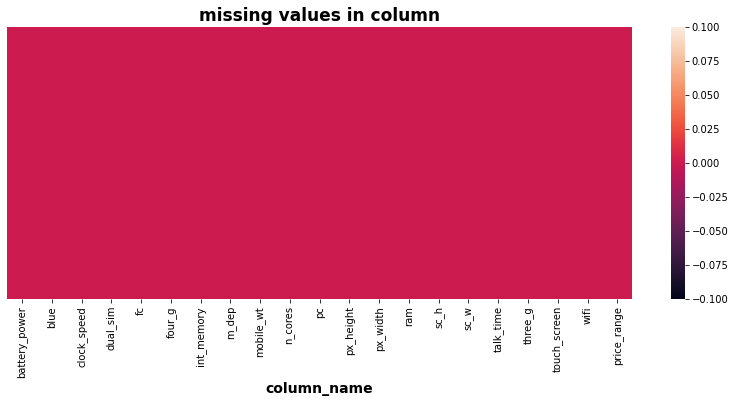

In [ ]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

## so we can clearly see that there is no missing Null values in our datasets

##<b> Exploratory Data Analysis

####<b>  Checking the categories of price range

In [ ]:
data['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#### <b> Boxplot between ram and price_range

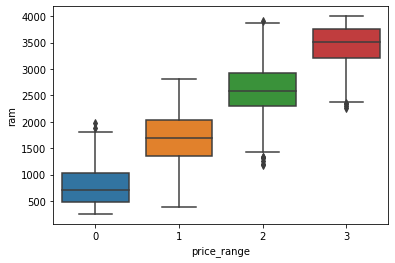

In [ ]:
#Boxplot between ram and price_range
sns.boxplot(y = 'ram' , x = 'price_range',data= data)
plt.show()

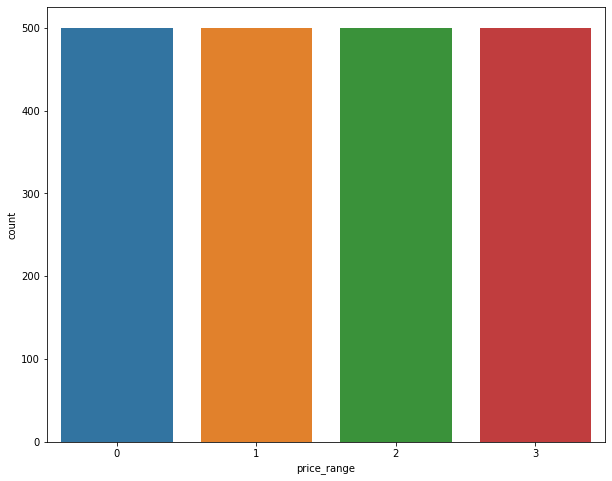

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='price_range', data=data)

In [ ]:
#Exploring the Range of the mobiles
numerical_features = data.describe().columns
numerical_features = numerical_features.drop('price_range')
dist_col1 = list(numerical_features[0:10])
dist_col2 = list(numerical_features[10:21])

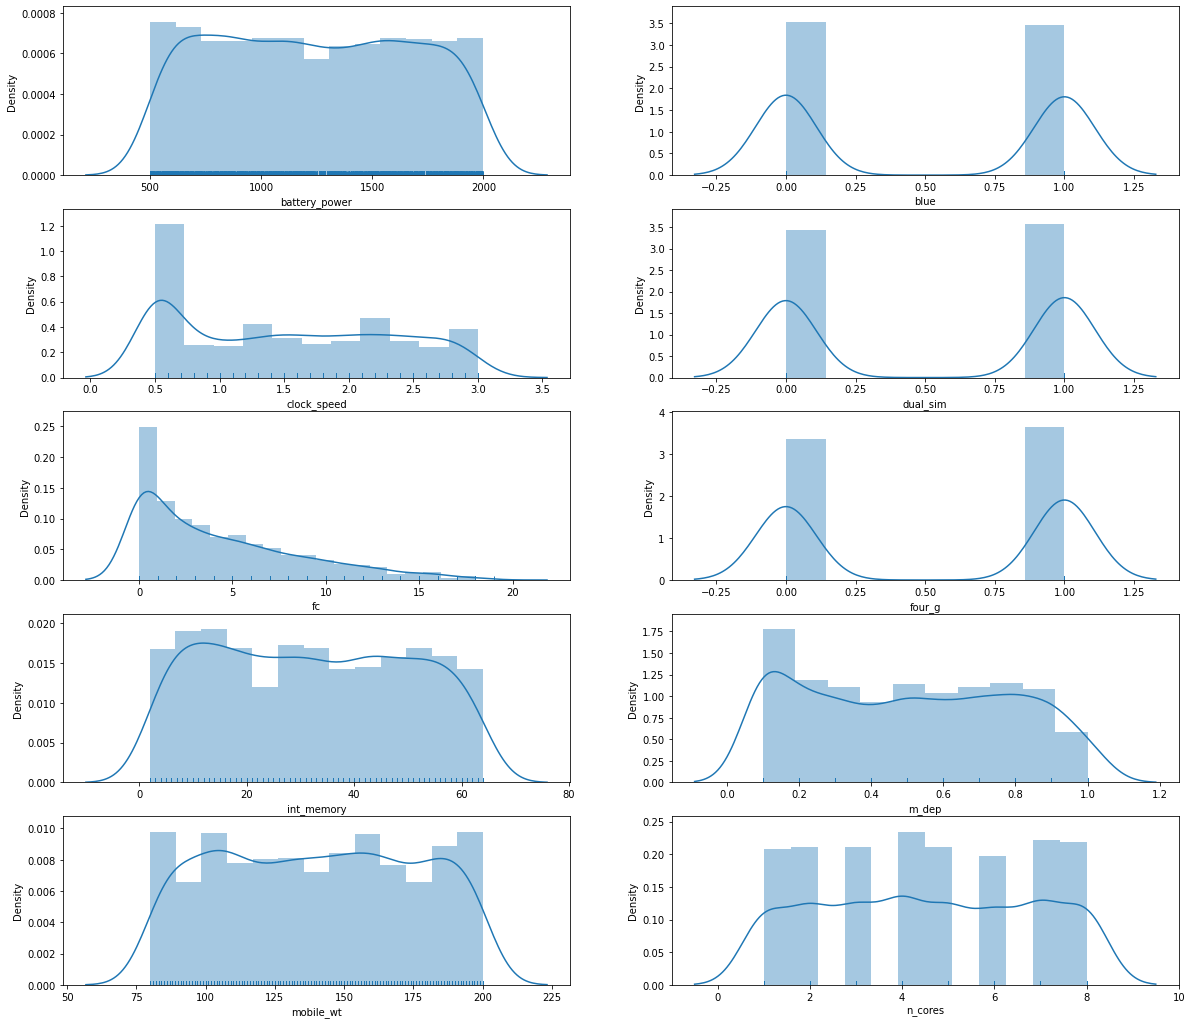

In [ ]:
plt.figure(figsize=(20,18))
for i in range(len(dist_col1)):
  plt.subplot(5,2,i+1)
  sns.distplot(data[dist_col1[i]], hist = True, rug = True)


In [ ]:
column=data.columns
column.shape

(21,)

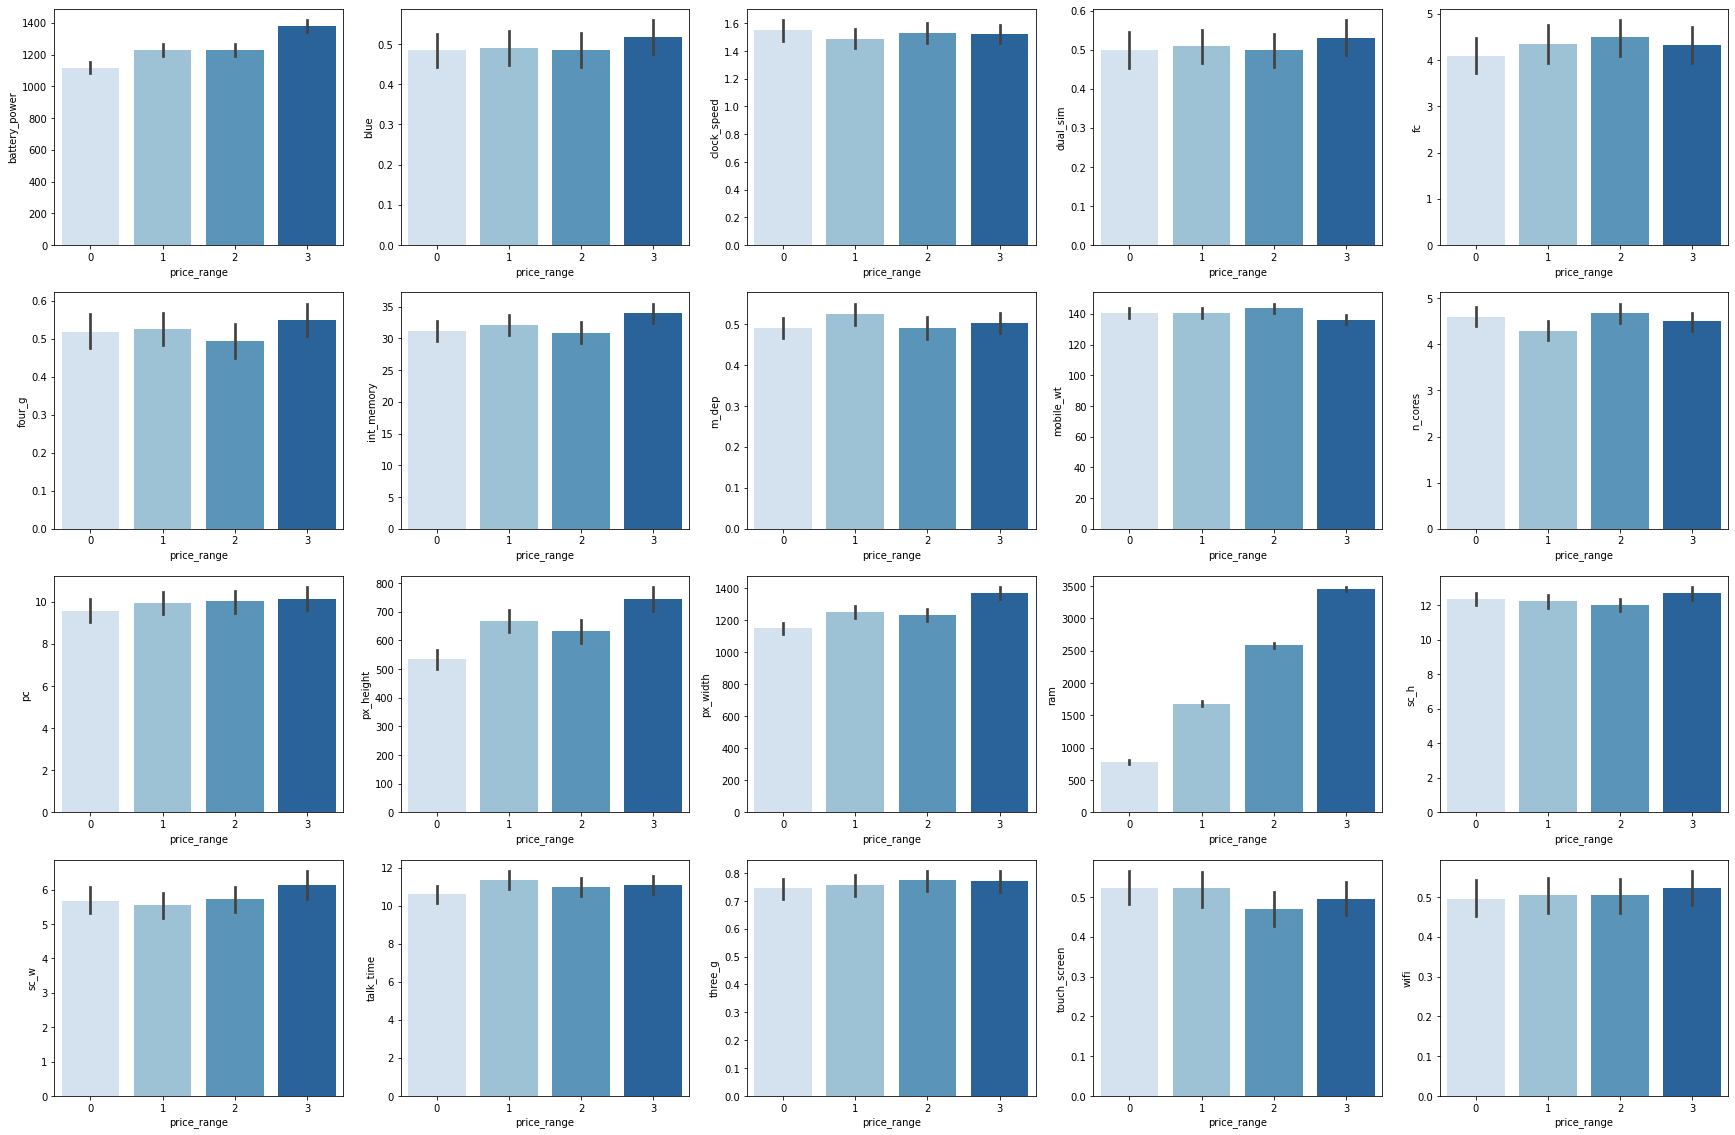

In [ ]:
#Relationship between Battery Power and Price Range
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
k=0
for i in range(4):
  for j in range(5):
 
      sns.barplot(ax=axes[i, j],data=data,x='price_range',y=column[k],palette = 'Blues')
 
      k=k+1

* Here we see that RAM of phone and price are highly corelated.Incress in ram Incress in price.

* After that 4g_band and batry of phone also afect phone price.

* Mobile wt is decrese when price high, but mobile size is increase.

#### <b> 3G supported or Not supported

([<matplotlib.patches.Wedge at 0x7face5afc890>,
 [Text(-0.8054050133969238, 0.7492147652009409, '3g supported'),
  Text(0.8054050133969238, -0.749214765200941, 'not supported')],
 [Text(-0.43931182548923114, 0.4086625992005132, '76.2%'),
  Text(0.43931182548923114, -0.40866259920051323, '23.8%')])

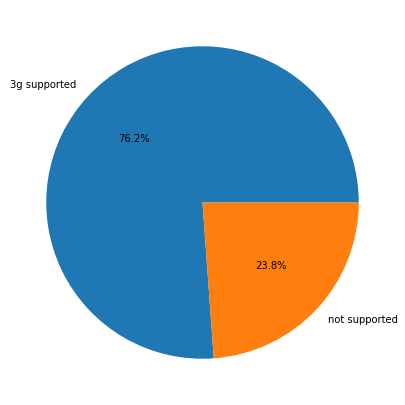

In [ ]:
plt.figure(figsize=(7,8))
labels = ['3g supported','not supported']
values =data['three_g'].value_counts().values
plt.pie(values, labels=labels,autopct='%1.1f%%')

#### So clearly 76.2% of mobiles supported 3G and 23.8% Not supported

#### <b> 4G

([<matplotlib.patches.Wedge at 0x7face78ae3d0>,
 [Text(-0.0742421550154638, 1.097491732278043, '4g supported'),
  Text(0.07424215501546366, -1.0974917322780433, 'not supported')],
 [Text(-0.0404957209175257, 0.5986318539698416, '52.1%'),
  Text(0.04049572091752563, -0.5986318539698418, '47.9%')])

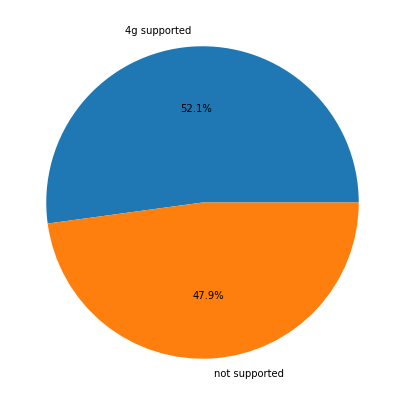

In [ ]:
# 4G Supported or not 
plt.figure(figsize=(7,8))
labels4g = ['4g supported','not supported']
values4g =data['four_g'].value_counts().values
plt.pie(values4g, labels=labels4g ,autopct='%1.1f%%')

### So clearly 52.1% of mobiles supported 4G and 47.8% Not supported 4G

### <b> Price range and 3G/4G

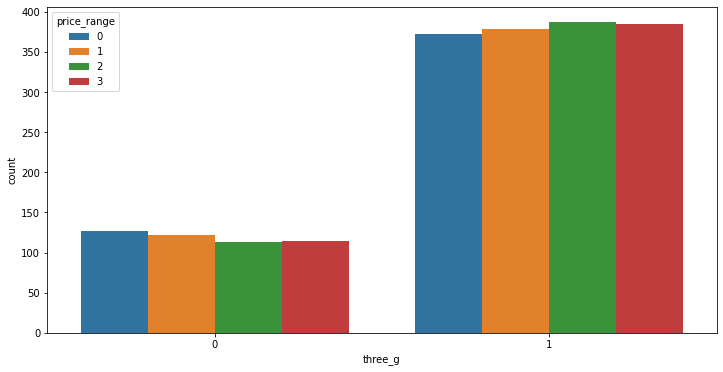

In [ ]:
#Relationship between Price range v/s 3G/4G
plt.figure(figsize = (12,6))
sns.countplot(data['three_g'] , hue = data['price_range'])
plt.show()

### <b>Price Range & Battery Power

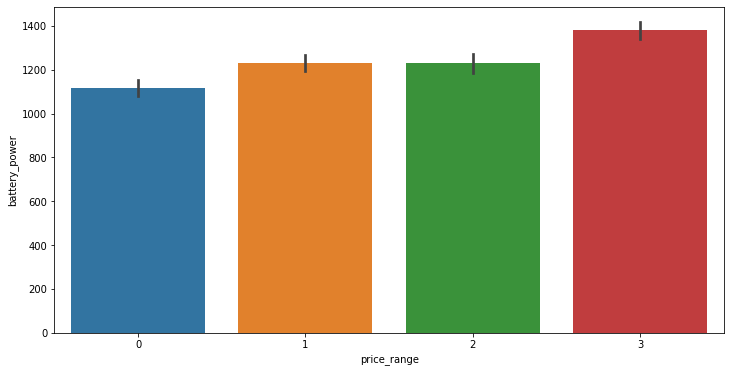

In [ ]:
#Relationship between Price range v/s Battery Power
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'battery_power', data=data)
plt.show()

### <b> Range & Pixel Height/Width

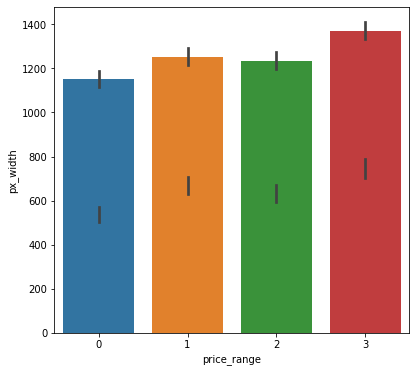

In [ ]:
#Relationship between Price range v/s Height/width
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=data)
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_width', data=data)
plt.show()

##<b> Checking Outliers

### <b> Price range and Battery Power

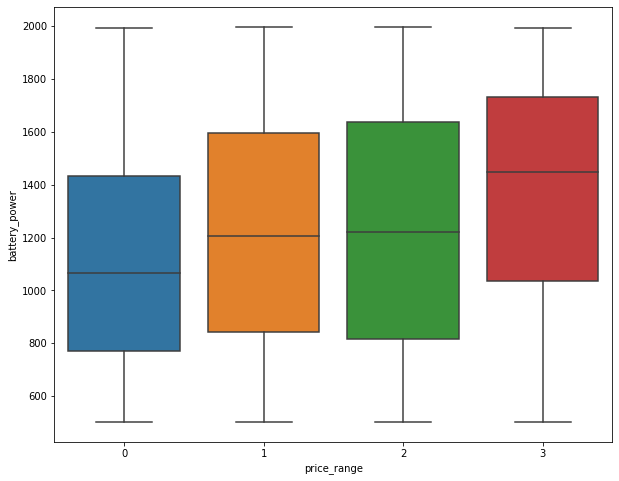

In [ ]:
#Relationship between Price range v/s Battery power
plt.figure(figsize=(10,8))
sns.boxplot(x='price_range', y='battery_power', data=data)

Text(0.5, 0, 'Mega Pixels')

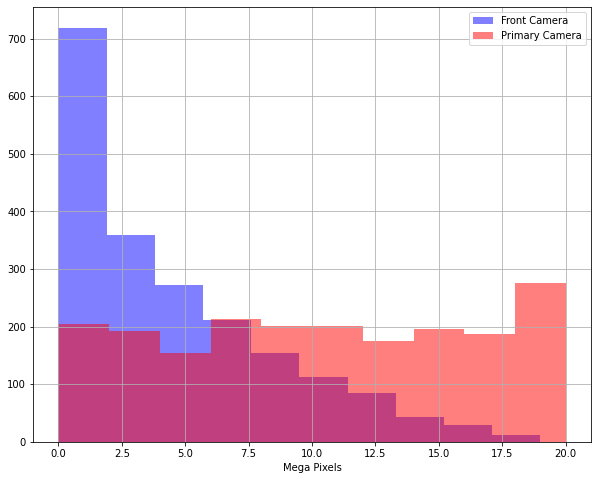

In [ ]:
#checking outtlier of Mega Pixels
plt.figure(figsize=(10,8))
data['fc'].hist(alpha=0.5, color='blue',label='Front Camera')
data['pc'].hist(alpha=0.5, color='red', label='Primary Camera')
plt.legend()
plt.xlabel('Mega Pixels')

## <b> Outlier Detection

### <b> Outlier detection is extensively used in a wide variety of applications such as military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, insurance or health care and fault detection in safety critical systems and in various kind of images.

In [ ]:
#outlier detection
box_list = ['clock_speed','fc','pc','sc_h','sc_w','int_memory','battery_power','px_height','px_width','ram']

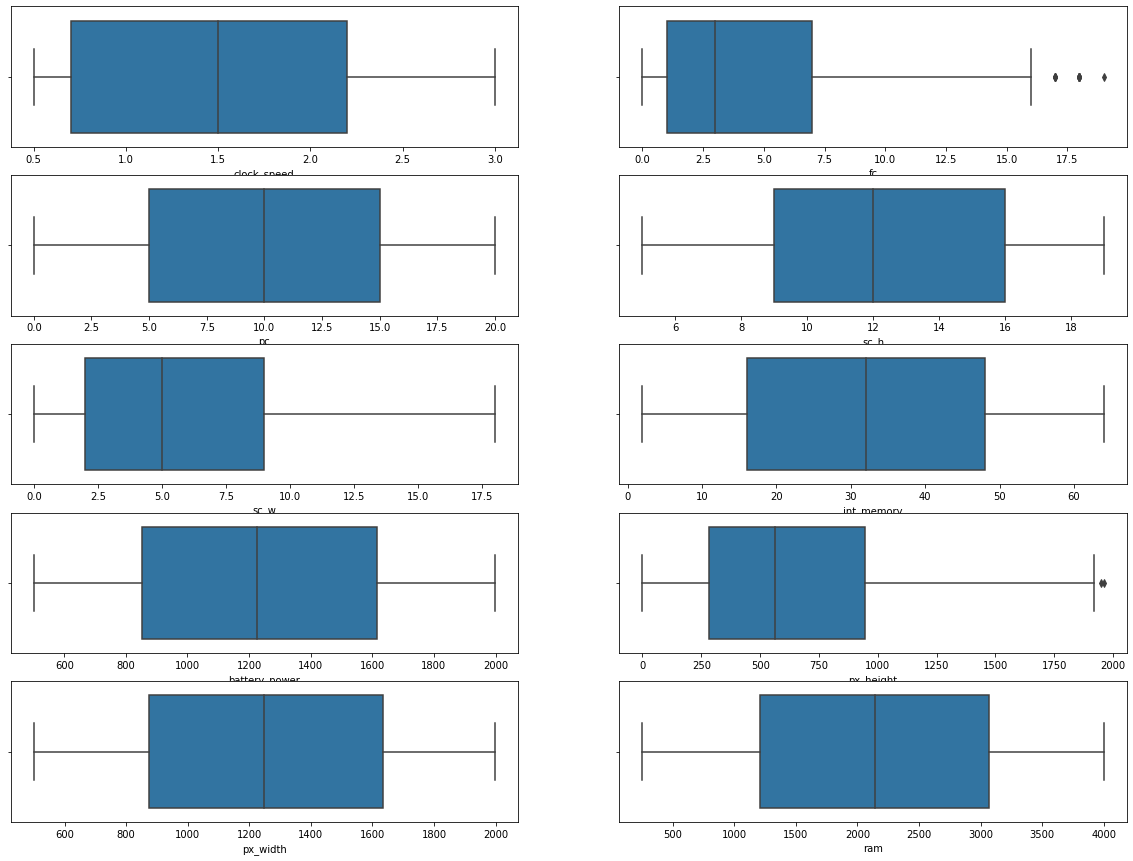

In [ ]:
plt.figure(figsize=(20,15))
for i in range(len(box_list)):
  plt.subplot(5,2,i+1)
  sns.boxplot(data[box_list[i]])

##<b> Corelation Heatmap

###<b> Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships.

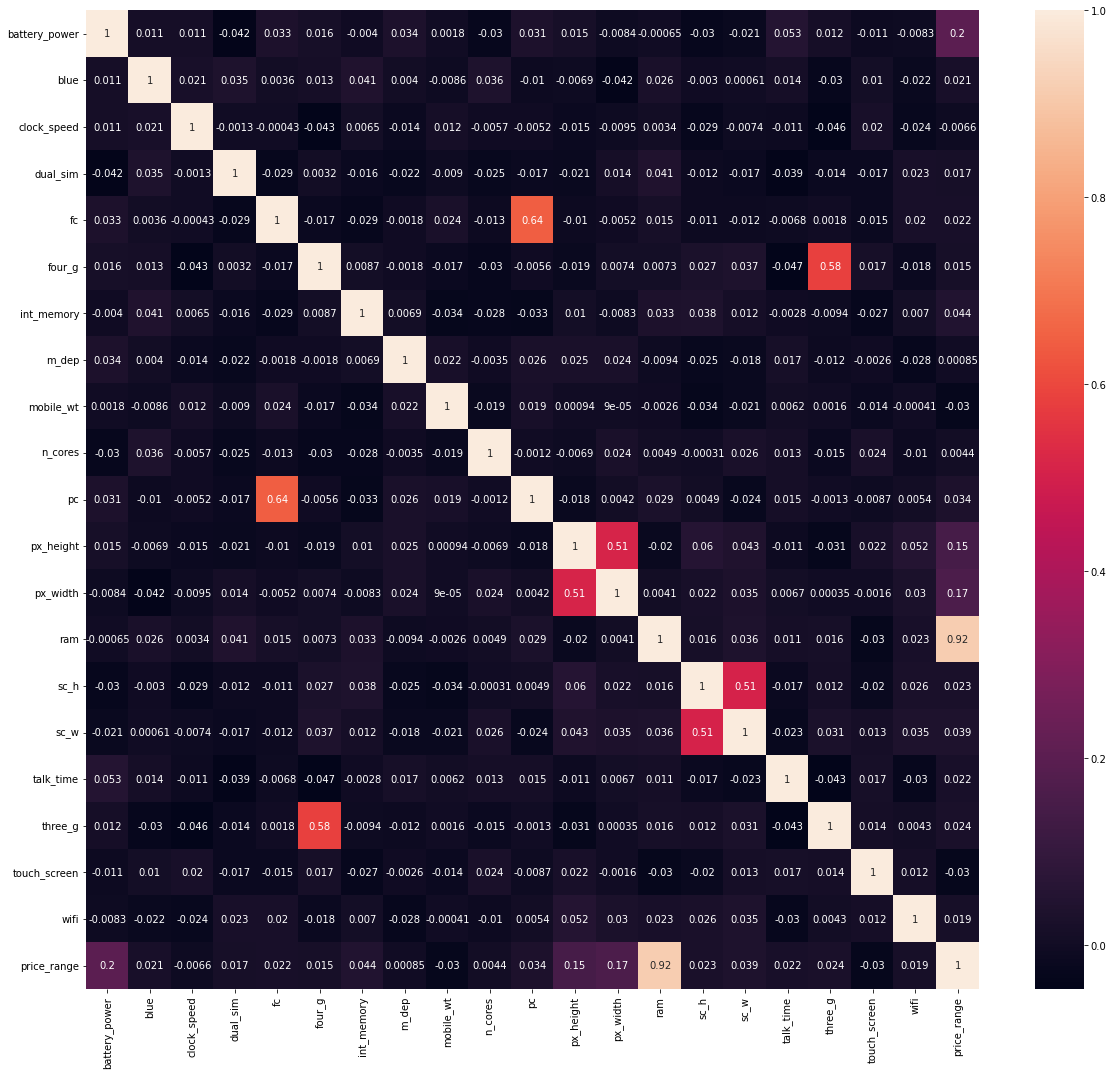

In [ ]:
plt.figure(figsize=(20,18))
correlation = data.corr()
sns.heatmap(correlation,annot=True)

#<b> Modelling

##<b>Splitting the dataset

##### <b> Independent variable

In [ ]:
#independent variables
X = data.drop('price_range',axis=1)

##### <b> Dependent variable

In [ ]:
#dependent variable
y = data['price_range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1340, 20)
(660, 20)


# <b> Fitting Models
In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: KNN Classifier, Logistic Regression, Random Forest Classifier, XGBoost Classifier.

### <b> The detailed step we will be following are as follows:

* Initial fitting of the model.

* Evaluating the performance of the model using metrics.

* Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.

#<b> 1. KNN Classifier

###<b> KNN aims for pattern recognition tasks. K-Nearest Neighbor also known as KNN is a supervised learning algorithm that can be used for regression as well as classification problems. Generally, it is used for classification problems in machine learning

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

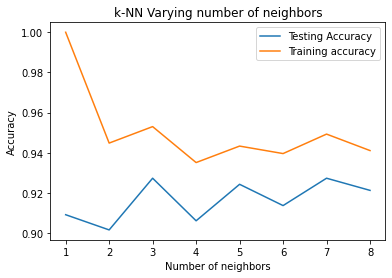

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### <b> Setup a knn classifier with k neighbors

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

#### <b> Fitting the model

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#calculating metrics
knn_test_score = knn.score(X_test,y_test)
knn_test_score

0.9272727272727272

In [ ]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

0.9492537313432836

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test,y_test_pred)
matrix

array([[160,   5,   0,   0],
       [  6, 153,   6,   0],
       [  0,   8, 149,   8],
       [  0,   0,  15, 150]])

#### <b>  plotting confusion matrix for train set

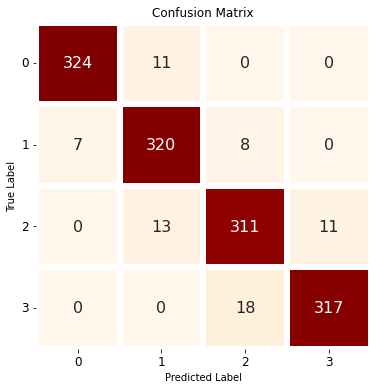

In [ ]:
#plotting confusion matrix for train set
cm = confusion_matrix(y_train, y_train_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

####<b> plotting confusion matrix for test set

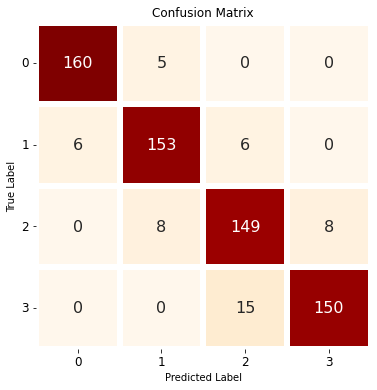

In [ ]:
#plotting confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#predicting 
y_pred_proba = knn.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9931741659014386

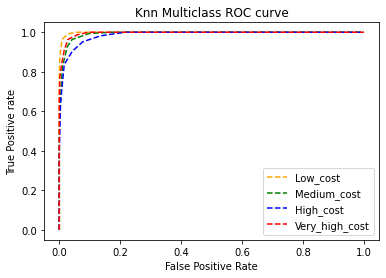

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
#printing classification report for train data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.96      0.94       335
           2       0.92      0.93      0.93       335
           3       0.97      0.95      0.96       335

    accuracy                           0.95      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.95      0.95      0.95      1340



In [ ]:
#printing classification report for test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       165
           1       0.92      0.93      0.92       165
           2       0.88      0.90      0.89       165
           3       0.95      0.91      0.93       165

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [ ]:
y_test_pred

array([0, 2, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3, 2, 1, 0, 3, 2, 0, 3, 3, 0, 2,
       1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 0, 3, 0, 0, 2, 0, 3, 1, 0, 1, 3, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 2, 0, 0, 1, 2, 3, 1, 2, 0, 2, 1, 1, 3, 2, 1, 1, 2, 3, 0, 2, 0,
       0, 0, 0, 3, 3, 0, 3, 1, 3, 2, 3, 1, 0, 2, 2, 0, 0, 3, 2, 2, 1, 0,
       3, 1, 1, 1, 0, 1, 2, 3, 3, 2, 0, 0, 1, 0, 3, 2, 0, 0, 0, 2, 3, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 3, 2, 3, 2, 3, 0, 3, 1, 2, 1, 3, 1,
       2, 0, 0, 1, 3, 3, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 3, 2, 0, 3, 3, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 1, 2, 2, 2, 3, 1,
       3, 0, 2, 2, 0, 3, 1, 1, 1, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 0,
       1, 0, 3, 3, 3, 2, 0, 1, 3, 1, 3, 0, 3, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 3, 3, 2, 0, 2, 1, 0, 0, 3, 0, 3, 2, 3, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 1, 1, 3, 1, 1, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 3, 0, 3, 3, 1, 2, 3, 0, 2, 3, 0, 0, 0, 2,

In [ ]:
y_test

1294    0
403     2
125     3
1871    3
297     1
       ..
303     3
1638    2
1804    1
893     1
262     0
Name: price_range, Length: 660, dtype: int64

#<b>2. Logistic Regression
###<b>Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

In [ ]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 101, stratify = y)

In [ ]:
# check whether the split works correctly 
print(X_train.shape)
print(X_valid.shape)

(1600, 20)
(400, 20)


In [ ]:
y_pred_lr = lr.predict(X_valid)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_lr)
confusion_matrix

array([[90,  9,  1,  0],
       [ 8, 66, 24,  2],
       [ 0, 14, 57, 29],
       [ 0,  0, 20, 80]])

In [ ]:
acc_lr = metrics.accuracy_score(y_valid, y_pred_lr)
acc_lr

0.7325

#### <b>so the accuracy of Logistic Regression is 0.7325

#<b> 3.Decision Tree
###<b>Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems.

In [ ]:
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_valid)

In [ ]:
dt_model

DecisionTreeClassifier(random_state=101)

#### <b>After building a decision tree model, now, we are going to measure the performance of the model by means of confusion matrix:

In [ ]:
print(metrics.confusion_matrix(y_valid, y_pred_dt))

[[89 11  0  0]
 [ 7 74 19  0]
 [ 1  9 80 10]
 [ 0  0 12 88]]


In [ ]:
# Even though precision and recall are good measures for imbalanced data, we can touch on these concepts here:
print(metrics.classification_report(y_valid, y_pred_dt)) 

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.79      0.74      0.76       100
           2       0.72      0.80      0.76       100
           3       0.90      0.88      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
acc_dt = metrics.accuracy_score(y_valid, y_pred_dt)
acc_dt

0.8275

#### <b>so the accuracy of Decision tree is 0.8275

#<b> 4. XGBoost Classifier

### <b> XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [ ]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier(random_state=0)
xgbmodel.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
XGBClassifier(objective='multi:softprob')

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred_train = xgbmodel.predict(X_train)
y_pred_test = xgbmodel.predict(X_test)

In [ ]:
xgbmodel.score(X_test,y_test)

0.9803030303030303

#### <b>so the accuracy of XGBoost is 0.9875

###<b> Hyperparameter tuning for XGBoost model

In [ ]:
n_estimators = list(np.arange(5,20,2,dtype='int64'))   #Number of Trees
max_depth = list(np.arange(10,25,1,dtype='int64'))     #Max depth of trees
learning_rate = list(np.arange(0.03,0.20,0.01))        #Learning rate
gamma = list(np.arange(10,20,1,dtype='int64'))         #gamma
subsample = [0.3,0.4,0.5,0.6]                          #subsamples

In [ ]:
#Hyperparameters assigning
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'learning_rate' : learning_rate,
              'gamma':gamma,
              'subsample':subsample}

In [ ]:
# Randomized Search CV
xgb_randomized = RandomizedSearchCV(estimator=xgbmodel, param_distributions=param_dict, cv=5,scoring = 'accuracy', random_state = 0)
xgb_randomized.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
                   param_distributions={'gamma': [10, 11, 12, 13, 14, 15, 16,
                                                  17, 18, 19],
                                        'learning_rate': [0.03, 0.04, 0.05,
                                                          0.060000000000000005,
                                                          0.07,
                                                          0.08000000000000002,
                                                          0.09000000000000001,
                                                          0.1,
                                                          0.11000000000000001,
                                                          0.12000000000000002,
                                                          0.13, 0.14,
                                                          0.15000000000000002,
                                 

In [ ]:
xgb_randomized.best_estimator_

XGBClassifier(gamma=12, learning_rate=0.13, max_depth=13, n_estimators=17,
              objective='multi:softprob', subsample=0.6)

In [ ]:
xgb_randomized.best_params_

{'gamma': 12,
 'learning_rate': 0.13,
 'max_depth': 13,
 'n_estimators': 17,
 'subsample': 0.6}

#<b> Conclusion

### <b> Which Model is most accurate?

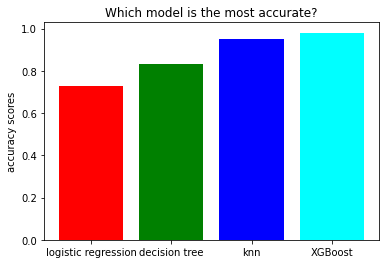

In [ ]:
models = ['logistic regression', 'decision tree', 'knn','XGBoost']
acc_scores = [0.73, 0.83, 0.95,0.9803]

plt.bar(models, acc_scores, color=['red', 'green', 'blue', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

####<b> After training our dataset with four different model, we conclude that XGBoost is best model for our dataset.
####<b>(via the highest accuracy score = 0.9803)


### 1 The 'price range' of the given dataset has equal distribution of the total number of phones in each of the price range with 500 nos.
### 2.It si observed that 76.2 percent are 3g supported and 27.8 percent are not supported.
### 3.It is observed that 52.1 percent are 4g supported and 47.9 percent are not supported.
### 4.There is only few number of outlier in 'fc' column in feature engineering and we can neglect it as it has negligible amount.
### 5.During Multivarite analysis, in correlation heatmap, we get to see that 'ram is highly correlated with 'price range' thus inferring that 'ram' has high impact on price prediction.
### 6.In K nearest Neighbors classification model, we have got the knn score as 56.25%, accuracy score of 67% for training set and 65% for test set.
During 'elbow method' we have got the insight that the optimum value of k is 22 with least error rate.
### 7.In Logistic Regression Model, we have got the log score as 91%. accuracy score of 75% for training set and 91% for test set.
### 8.In XGBoost model the score was 98% before hyper parameter tuning.
RandomizedSearchCV is used for hyperparameter tuning in XGBoost classifier and the accuracy obtained after hyper parameter tuning was 86% for training set and 80% for test set.
### 9.Finally, in the model explaininabilty we have used shap and we got the insight that 'ram', 'battery power', and phone dimensions are the features which is deciding as key factoe for the price range predsiction.

# <b> END